In [1]:
import numpy as np
ID_labels = {}

direccion_ceph = 'CEPH_catalog_crossmatch_eros_ogle.csv'
etiquetas_ceph = np.genfromtxt(direccion_ceph, 'string', delimiter=',')

direccion_RRL = 'RRL_catalog_crossmatch_eros_ogle.csv'
etiquetas_RRL = np.genfromtxt(direccion_RRL, 'string', delimiter=',')

direccion_EB = 'EB_catalog_crossmatch_eros_ogle.csv'
etiquetas_EB = np.genfromtxt(direccion_EB, 'string', delimiter=',')

ogle_id_ceph = etiquetas_ceph[1:len(etiquetas_ceph), 1]
labels_ceph = etiquetas_ceph[1:len(etiquetas_ceph), 4]

ogle_id_RRL = etiquetas_RRL[1:len(etiquetas_RRL), 1]
labels_RRL = etiquetas_RRL[1:len(etiquetas_RRL), 4]

ogle_id_EB = etiquetas_EB[1:len(etiquetas_EB), 1]
labels_EB = etiquetas_EB[1:len(etiquetas_EB), 4]


for indice in range(len(ogle_id_ceph)):
    ID_labels[ ogle_id_ceph[indice] ] = labels_ceph[indice]
    
for indice in range(len(ogle_id_RRL)):
    ID_labels[ ogle_id_RRL[indice] ] = labels_RRL[indice]

for indice in range(len(ogle_id_EB)):
    ID_labels[ ogle_id_EB[indice] ] = labels_EB[indice]

In [11]:
import pickle
nombre_archivo_load = "final_features.p"
caracteristicas = pickle.load( open( nombre_archivo_load , "rb" ) )

"""
red_features = pickle.load( open( 'newfeatures1.p' , "rb" ) )
azul_features = pickle.load( open('azulFeatures.p' , "rb" ))

azul_periodics = pickle.load( open('azul_periodics.p' , "rb" ))
red_periodics =  pickle.load( open('red_periodics.p' , "rb" ))


len_azulf = len(azul_features[0,:])

len_azulp = len(azul_periodics[0,:])

len_redp = len(red_periodics[0,:])

caracteristicas_fake = np.concatenate((red_features, azul_features[:,1:len_azulf]), axis=1)


carac_feik = np.concatenate((caracteristicas_fake, azul_periodics[:,1:len_azulp]), axis = 1)

caracteristicas = np.concatenate((carac_feik, red_periodics[:,1:len_redp]), axis = 1)
"""

"""
# NOMBRES DE CARACTERISTICAS DEL ARCHIVO newfeatures.1.p. A FUTURO SE PIENSA CONCATENAR CARACTERISTICAS EN UNA MATRIX MAYOR
features_names = ['Red_mean', 'Red_std', 'Red_MagRatio', 'Red_amplitude', 'Red_skew', 'Red_kurt', 'Red_quartile31', \
                  'Red_stetson', 'Red_eta', 'Red_cusum', 'Red_shapiro', 'Red_B1std', 'Red_slope_trend', 'B_R', 'period', \
                  'Blue_mean', 'Blue_std', 'Blue_MagRatio', 'Blue_amplitude', 'Blue_skew', 'Blue_kurt', 'Blue_quartile31', \
                  'Blue_stetson', 'Blue_eta', 'Blue_cusum', 'Blue_shapiro', 'Blue_B1std',\
                  'Blue_amplitude', 'Blue_r21', 'Blue_r31', 'Blue_f_phase', 'Blue_phi21', 'Blue_phi31' \
                  'Red_phase_eta', 'Red_slope_per10', 'Red_slope_per90', 'Red_phase_cusum', \
                  'Red_amplitude', 'Red_r21', 'Red_r31', 'Red_f_phase', 'Red_phi21', 'Red_phi31', 'cancer']
"""


features_names= ['Red Promedio','Red std','Red MagRatio','Red amplitude',\
                  'Red_skewness','Red_kurtosis', 'Red_Percentil 25-75', 'Red_stetson', 'Red_eta', 'Red Suma',\
                  'Red Shapiro', 'Red_B1std', 'Red Mag Ratio', \
                  'Red_phase_eta', 'Red Slope Per10', 'Red Slope Per90','Red_phase_cusum', \
                  'Red Amplitud H1', 'Red R21', 'Red R31', 'Red f_phase', 'Red_phi21', 'Red_phi31', \
                  'Blue Promedio', 'Blue Std', 'Blue Mag_Ratio', 'Blue Amplitud',\
                  'Blue skewness','Blue kurtosis', 'Blue Percentil 25-75', 'Blue Stetson', 'Blue Eta', 'Blue Suma',\
                  'Blue Shapiro', 'Blue B1std','Blue Mag Ratio',\
                  'Blue_phase_eta', 'Blue Slope Per10', 'Blue Slope Per90','Blue_phase_cusum', \
                  'Blue Amplitud H1', 'Blue R21', 'Blue R31', 'Blue_f_phase', 'Blue_phi21', 'Blue_phi31', \
                  'B-R', 'Periodo']
    

### Codigo para extraer extraer las subclases de cada una de las tres grandes clases ### 
########################################################################################
subclass = []
for ide in ID_labels:
    label_verify = ID_labels[ide]
    if not (label_verify in subclass):
        subclass.append(label_verify)

RRL_subclases = []
Cefeids_subclases = []
EB_subclases = []

for element in subclass:
    if element[0] == "R":
        RRL_subclases.append(element)   
    elif element[0] == "E":
        EB_subclases.append(element)
    else:
        Cefeids_subclases.append(element) 
           
#####  Rearmar las clases de manera que cada una se codifica con un número 0,1 o 2 ##### 
########################################################################################
        
def three_classes(labels_list):
    RRL = 0
    CEFEIDS = 1
    ECLIPSANTES = 2
    
    new_labels = []
    for etiqueta in labels_list:
        if etiqueta in RRL_subclases:
            new_labels.append(RRL)
        elif etiqueta in Cefeids_subclases:
            new_labels.append(CEFEIDS)
        else:
            new_labels.append(ECLIPSANTES)
    return new_labels


#####      Armar lista de clases a considerar en la clasificación de todas juntas  ##### 
########################################################################################

legit_clases = []
for subclase in RRL_subclases:
    legit_clases.append(subclase)
for subclase in Cefeids_subclases:
    if not (subclase == '13' or subclase == '123' or subclase == 'F12'):
        legit_clases.append(subclase)
for subclase in EB_subclases:
    if not (subclase == 'ED_TEB' or subclase == 'ESD_DPV'):
        legit_clases.append(subclase)
          

#####                     Traspasa los labels a codificación númerica              ##### 
########################################################################################

def all_clases(labels_list):
    
    new_labels = []
    errors = 0
    for etiqueta in labels_list:
        try:
            indice = legit_clases.index(etiqueta)
            new_labels.append(indice)
        except (ValueError):
            errors = errors + 1
            if etiqueta == 'ESD_DPV' or etiqueta == 'ED_TEB':
                index = legit_clases.index('ESD')
            elif etiqueta == '13' or etiqueta == '123' or etiqueta == 'F12': 
                index = legit_clases.index('ED')
            else:
                print "VALUE NOT CONSIDERED"
            new_labels.append(indice)
    
    return new_labels
            
            
only_labels = caracteristicas[:,0]                #Del vector de características generado, extraer columna de labels
big_class_labels = three_classes(only_labels)     #Codificacion para tres grandes clases
all_class_labels = all_clases(only_labels)        #Codificacion para todas las clases juntas



print "Conjunto de todas las clases: "
print legit_clases

Conjunto de todas las clases: 
['RRab', 'RRc', 'RRd', 'RRe', '1', 'F', '12', 'F1', '2', 'ESD', 'ED', 'EC', 'ED_ESD', 'ELL_EC', 'ED_VAR']


Feature ranking:
1. Blue R21: 0.0558052983422
2. Periodo: 0.0503931759193
3. Blue Mag Ratio: 0.0425405876209
4. Blue skewness: 0.0404802640712
5. Red R21: 0.0334020247614
6. Blue kurtosis: 0.033182932434
7. Blue Slope Per10: 0.0318787292835
8. Red Promedio: 0.0297733784679
9. Blue Slope Per90: 0.0287875191717
10. Blue Promedio: 0.0279387779279
11. Blue Stetson: 0.0272420232739
12. Blue R31: 0.026557273903
13. Blue_phase_eta: 0.0265123094396
14. Red_kurtosis: 0.0264054662
15. Blue Amplitud H1: 0.0260316146307
16. Red Slope Per90: 0.0223335458968
17. Red Slope Per10: 0.022325755396
18. Red Amplitud H1: 0.0214425940831
19. Red std: 0.0211863059455
20. Blue Percentil 25-75: 0.0209536756387
21. Red_phase_eta: 0.0208600446088
22. Red R31: 0.0206173302797
23. Blue Std: 0.0201566243532
24. Blue B1std: 0.0200040273642
25. Red_stetson: 0.019430424299
26. Red_Percentil 25-75: 0.0179213293186
27. Red_B1std: 0.0175892607855
28. Red_skewness: 0.0167264709796
29. Red amplitude: 0.0162743905674
30. Bl

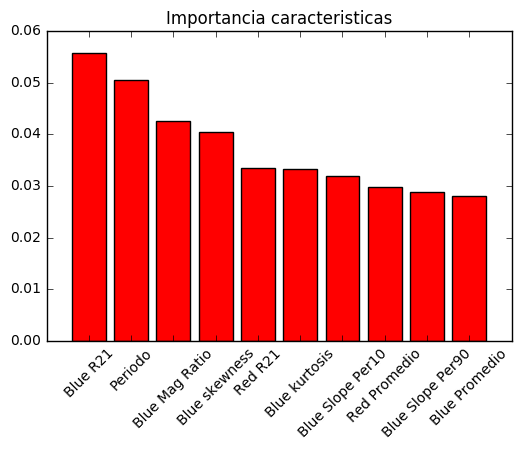

In [12]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


N_features = len(caracteristicas[1,:])
X_all = caracteristicas[:,1:N_features]
Y_all = all_class_labels

'''
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:, 0], X[:, 2], c=Y, linewidth=0, alpha=0.5, s=20)
plt.grid()
'''

X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(X_all, Y_all, train_size=0.25, random_state = True)

clf_all = RandomForestClassifier(n_estimators=600, max_depth=None, bootstrap = True, n_jobs=-1, class_weight='balanced_subsample')
clf_all.fit(X_train_all, Y_train_all)
Y_pred_all = clf_all.predict_proba(X_test_all)


importances = clf_all.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_all.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


"""
# Print the feature ranking
print("Feature ranking:")

for f in range(X_all.shape[1]):
    
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print str(f+1)+". "+ features_names[indices[f]] + ": "+str(importances[indices[f]])
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_all.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_all.shape[1]), indices)
plt.xlim([-1, X_all.shape[1]])
plt.show()

"""

# Print the feature ranking
def get_order(indices):
    salida = []
    for i in indices:
        salida.append(features_names[i])
    return salida

print("Feature ranking:")
for f in range(X_all.shape[1]):
    
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print str(f+1)+". "+ features_names[indices[f]] + ": "+str(importances[indices[f]])
    
indices2 = indices[0:10]
#features_names2 = features_names[indices]
#features_names3 = features
# Plot the feature importances of the forest
plt.figure()
plt.title("Importancia caracteristicas")
plt.bar(range(10), importances[indices2],
       color="r", align="center")
#plt.bar(range(10), importances[indices2],
#       color="r", yerr=std[indices2], align="center")
nombres = get_order(indices2)
plt.xticks( np.arange(len(nombres)), nombres, rotation=45)
plt.xlim([-1, 10])
plt.show()


In [8]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

def prediction(arreglo):
    n_clases = len(arreglo[0])
    pred = []
    for prediccion in arreglo:
        actual_max = 0
        indice_max = 0
        for i, dato in enumerate(prediccion):
            if dato >= actual_max:
                actual_max = dato
                indice_max = i
        pred.append(indice_max)
    return pred
                

y_test_all = Y_test_all
pred_all = Y_pred_all
pred_pscore_all = prediction(pred_all)

#score = metrics.f1_score(y_test_all, pred_all, pos_label=list(set(y_test_all)), average = 'samples')
# training score
#score_train = metrics.f1_score(y_train, pred_train, pos_label=list(set(y_train)))

scores_type=None


pscore_all = metrics.accuracy_score(y_test_all, pred_pscore_all)
print "Accuracy:", pscore_all

labels_ = np.linspace(0,len(legit_clases),len(legit_clases)+1)

precision_all = metrics.precision_score(y_test_all, pred_pscore_all, average=scores_type)
print "Precision: ", precision_all

recall_all = recall_score(y_test_all, pred_pscore_all, average=scores_type) 
print "Recall: ", recall_all

f1_all = f1_score(y_test_all, pred_pscore_all, average=scores_type) 
print "F1 Score: ", f1_all


#scores = cross_val_score(clf_all, X_test_all, y_test_all)
#print "Scores test:", scores.mean()




Accuracy: 0.857789399578
Precision:  [ 0.96986842  0.8080634   0.96116505  0.73129252  0.91005291  0.98892989
  0.73553719  0.95454545  0.5         0.66430359  0.7668444   0.76335878
  0.          0.125       0.        ]
Recall:  [ 0.98939597  0.94670973  0.62526316  0.44147844  0.87755102  0.97277677
  0.6953125   0.48837209  0.33333333  0.64967374  0.88976378  0.38022814
  0.          0.00952381  0.        ]
F1 Score:  [ 0.97953488  0.87190928  0.75765306  0.55057618  0.89350649  0.98078683
  0.71485944  0.64615385  0.4         0.65690722  0.82374382  0.50761421
  0.          0.01769912  0.        ]



fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:, 0], X[:, 2], c=Y, linewidth=0, alpha=0.5, s=20)
plt.grid()

Confusion matrix, without normalization
Normalized confusion matrix


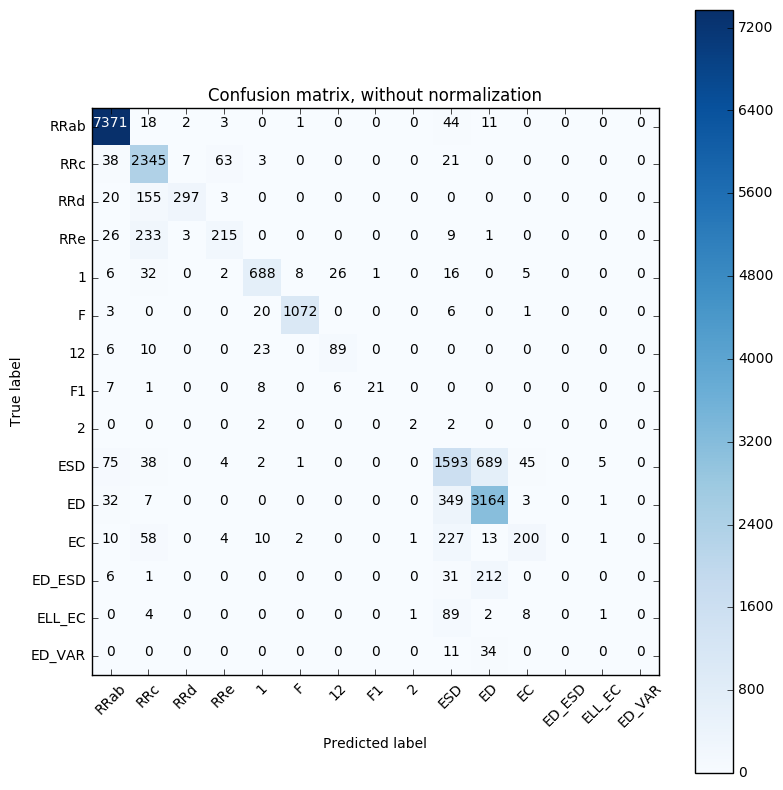

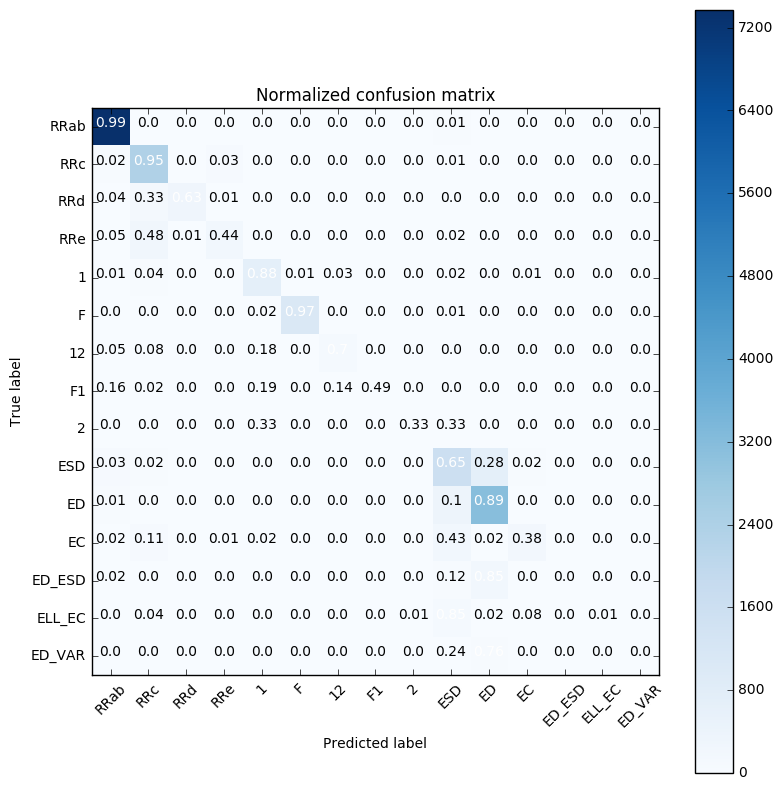

In [14]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = legit_clases

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_all, pred_pscore_all)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# RR Lyrae Clasificador

In [9]:
def just_this_class(class_list_names):
    not_first = True
    for i in range(len(caracteristicas)):
        if caracteristicas[i,0] in class_list_names:
            a = np.array([np.array(caracteristicas[i])])
            if not_first:
                output = a
                not_first = False
            else:
                output = np.concatenate((output,a), axis=0)
    return output
    
            
lyraes = just_this_class(RRL_subclases)


In [16]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


def label_encoder(label_list, labels_names):
    new_labels = []
    for etiqueta in label_list:
        indice = labels_names.index(etiqueta)
        new_labels.append(indice)
    return new_labels


def random_forest(X, Y, n_arboles):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.25)

    clf = RandomForestClassifier(n_estimators=n_arboles, max_depth=None, bootstrap = True, n_jobs = -1,class_weight='balanced_subsample' )
    clf = clf.fit(X_train, Y_train)
    Y_pred = clf.predict_proba(X_test)


    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):

        #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        print str(f+1)+". "+ features_names[indices[f]] + ": "+str(importances[indices[f]])

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()
    return clf, Y_test, Y_pred

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 3)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def prediction(arreglo):
    n_clases = len(arreglo[0])
    pred = []
    for prediccion in arreglo:
        actual_max = 0
        indice_max = 0
        for i, dato in enumerate(prediccion):
            if dato >= actual_max:
                actual_max = dato
                indice_max = i
        pred.append(indice_max)
    return pred

def confusion_final(Y_test, Y_pred, classes_names):
    y_test = Y_test
    pred = Y_pred
    pred_pscore = prediction(pred)

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, pred_pscore)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=classes_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=classes_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

Feature ranking:
1. period: 0.115234275222
2. Blue_r21: 0.0933201987601
3. Blue_hl_amp_ratio: 0.0603780289759
4. Blue_stetson: 0.056822706934
5. Blue_phase_eta: 0.0518833056791
6. Blue_r31: 0.0466799829702
7. Red_r21: 0.0444925377213
8. Blue_skew: 0.0397343110195
9. Blue_amplitude_f: 0.037814980416
10. Red_phase_eta: 0.0342496478634
11. Red_amplitude_f: 0.0323051237077
12. Blue_kurt: 0.018705267502
13. Red_r31: 0.018569133176
14. Blue_phase_cusum: 0.0184490719085
15. Blue_weighted_std: 0.0176915190228
16. Blue_shapiro: 0.0175295425807
17. Red_weighted_mean: 0.0172150867945
18. Blue_quartile31: 0.0149642553674
19. Blue_weighted_mean: 0.0137576838774
20. Red_hl_amp_ratio: 0.013280213398
21. Blue_B1std: 0.013228171577
22. Blue_slope_per10: 0.0122189388767
23. B_R: 0.011799024457
24. Blue_slope_per90: 0.0114070773082
25. Blue_MagRatio: 0.0102206320831
26. Red_stetson: 0.0101916177542
27. Blue_amplitude: 0.0100796593951
28. Blue_eta: 0.00935206726538
29. Red_slope_per10: 0.00906687146148
30

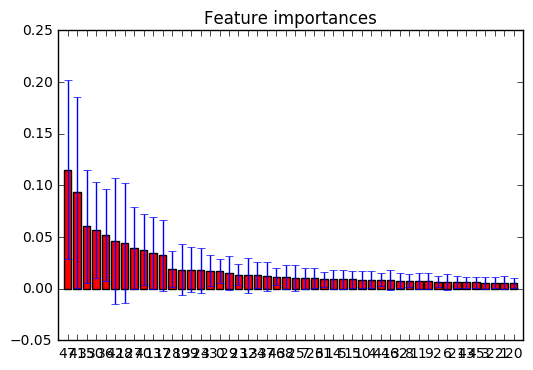

Confusion matrix, without normalization
[[7410   17    2    6]
 [  34 2379    3   44]
 [  30  167  285    3]
 [  26  274    0  204]]
Normalized confusion matrix
[[ 1.    0.    0.    0.  ]
 [ 0.01  0.97  0.    0.02]
 [ 0.06  0.34  0.59  0.01]
 [ 0.05  0.54  0.    0.41]]


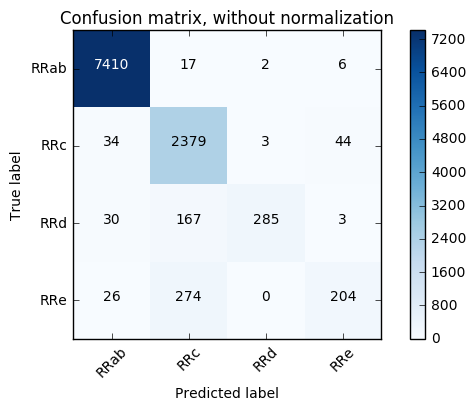

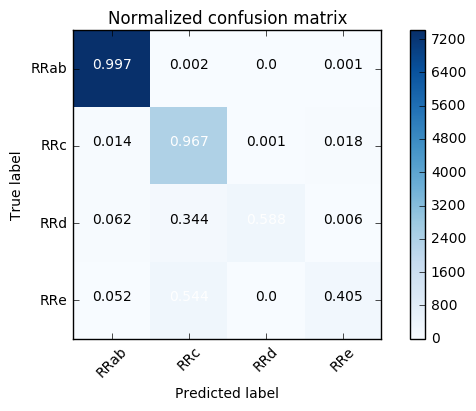

In [17]:
N_features = len(lyraes[1,:])
X_rrl = lyraes[:,1:N_features]

Y_rrl = label_encoder(lyraes[:,0], RRL_subclases)

rll_classifier, Y_rrl_test, rrl_pred = random_forest(X_rrl, Y_rrl, 600)

confusion_final(Y_rrl_test, rrl_pred, RRL_subclases)



# CEFEIDAS

In [34]:
cephs = just_this_class(Cefeids_subclases)

Feature ranking:
1. Blue_r21: 0.0554234764305
2. Red_r21: 0.0530562110249
3. period: 0.0505349088328
4. Blue_slope_per10: 0.0470391276755
5. Blue_slope_per90: 0.0424471447303
6. Blue_phase_eta: 0.041507389952
7. Red_amplitude_f: 0.0403538814929
8. Red_kurt: 0.0342230833605
9. Red_quartile31: 0.0335062281617
10. Blue_quartile31: 0.0326208660131
11. Red_slope_per90: 0.0300780693911
12. Red_slope_per10: 0.0284506870166
13. Red_phase_eta: 0.027372584507
14. Blue_weighted_std: 0.0270733031217
15. Blue_phase_cusum: 0.0253862197246
16. Red_weighted_std: 0.0244711586336
17. Blue_phi21: 0.0233034121093
18. Blue_kurt: 0.0223880290628
19. Blue_amplitude_f: 0.0215132902457
20. Blue_cusum: 0.0211801807931
21. Blue_amplitude: 0.0210920469677
22. Red_phase_cusum: 0.0209597706659
23. Blue_r31: 0.0209059239252
24. Red_weighted_mean: 0.0198897651313
25. Blue_stetson: 0.0173806096138
26. Blue_phi31: 0.0172008320326
27. Red_skew: 0.015134604882
28. Red_amplitude: 0.0143517111858
29. Red_r31: 0.01381551942

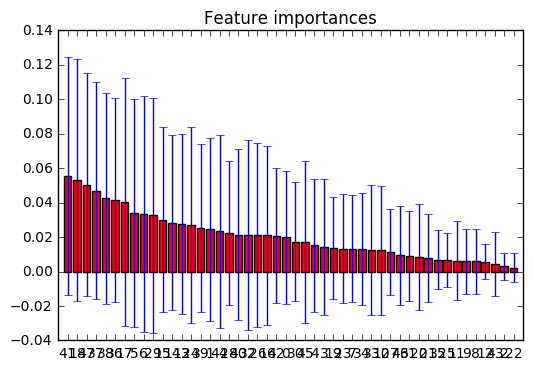

Confusion matrix, without normalization
[[ 746    9   12    2    0    0    0    0]
 [  26 1085    0    0    0    0    0    0]
 [  49    1   78    0    0    0    0    0]
 [  10    0    3   22    0    0    0    0]
 [   1    0    0    0    0    0    0    0]
 [  10    0    0    0    0    0    0    0]
 [   1    0    1    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0]]
Normalized confusion matrix
[[ 0.97  0.01  0.02  0.    0.    0.    0.    0.  ]
 [ 0.02  0.98  0.    0.    0.    0.    0.    0.  ]
 [ 0.38  0.01  0.61  0.    0.    0.    0.    0.  ]
 [ 0.29  0.    0.09  0.63  0.    0.    0.    0.  ]
 [ 1.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 1.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.5   0.    0.5   0.    0.    0.    0.    0.  ]
 [ 1.    0.    0.    0.    0.    0.    0.    0.  ]]


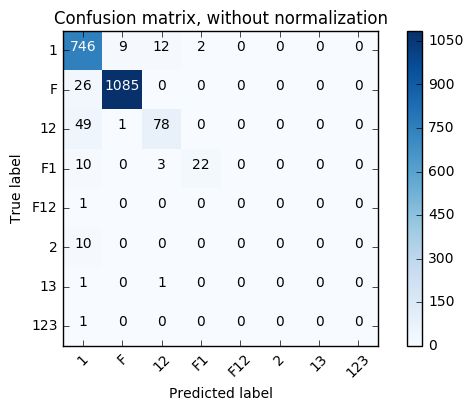

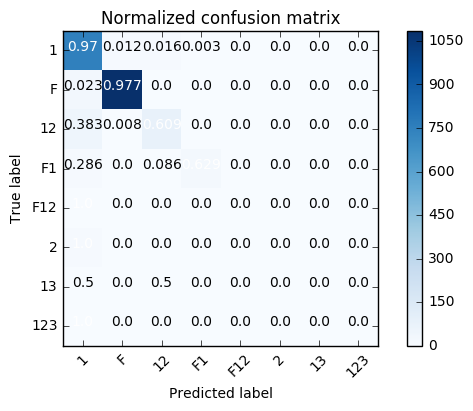

In [35]:
N_features = len(cephs[1,:])
X_cephs = cephs[:,1:N_features]

Y_cephs = label_encoder(cephs[:,0], Cefeids_subclases)

cephs_classifier, Y_cephs_test, cephs_pred = random_forest(X_cephs, Y_cephs, 600)

confusion_final(Y_cephs_test, cephs_pred, Cefeids_subclases)


Feature ranking:
1. Blue_r21: 0.0504469473321
2. Red_r21: 0.0403714541242
3. Blue_kurt: 0.0314883700448
4. Blue_r31: 0.0311296121028
5. Red_r31: 0.0294213338398
6. Blue_shapiro: 0.0287178930046
7. Blue_skew: 0.0279789693649
8. Blue_stetson: 0.0262912957305
9. Blue_hl_amp_ratio: 0.025743282065
10. Blue_phase_eta: 0.024916472653
11. Blue_MagRatio: 0.0244981658007
12. Red_B1std: 0.0239097015691
13. Red_slope_per10: 0.0237180284329
14. Red_weighted_mean: 0.0229296304363
15. Red_slope_per90: 0.0222533442824
16. Red_MagRatio: 0.0220899572665
17. period: 0.0220168185962
18. Blue_quartile31: 0.0215839356824
19. Blue_phi21: 0.0212874402966
20. Blue_phase_cusum: 0.0207353902582
21. Red_phase_eta: 0.0204449810599
22. Blue_weighted_mean: 0.0203077753427
23. B_R: 0.0200190237787
24. Blue_slope_per10: 0.0197657713653
25. Blue_slope_per90: 0.0183289565092
26. Blue_cusum: 0.018275701902
27. Red_amplitude_f: 0.0182531064385
28. Blue_B1std: 0.0181323587915
29. Red_phi31: 0.0180955636467
30. Blue_amplitu

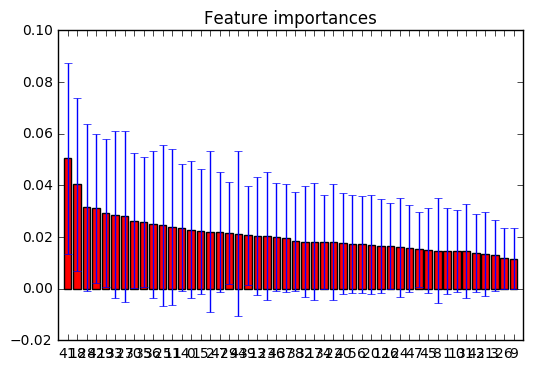

Confusion matrix, without normalization
[[1709  676   25    0   24    0    0    0]
 [ 407 3141    1    0    2    0    0    0]
 [ 313   15  225    0    7    0    0    0]
 [  30  209    0    0    1    0    0    0]
 [  82    4    9    0   10    0    0    0]
 [   7    1    1    0    0    0    0    0]
 [   9   34    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0    0]]
Normalized confusion matrix
[[ 0.7   0.28  0.01  0.    0.01  0.    0.    0.  ]
 [ 0.12  0.89  0.    0.    0.    0.    0.    0.  ]
 [ 0.56  0.03  0.4   0.    0.01  0.    0.    0.  ]
 [ 0.12  0.87  0.    0.    0.    0.    0.    0.  ]
 [ 0.78  0.04  0.09  0.    0.1   0.    0.    0.  ]
 [ 0.78  0.11  0.11  0.    0.    0.    0.    0.  ]
 [ 0.21  0.79  0.    0.    0.    0.    0.    0.  ]
 [ 0.    1.    0.    0.    0.    0.    0.    0.  ]]


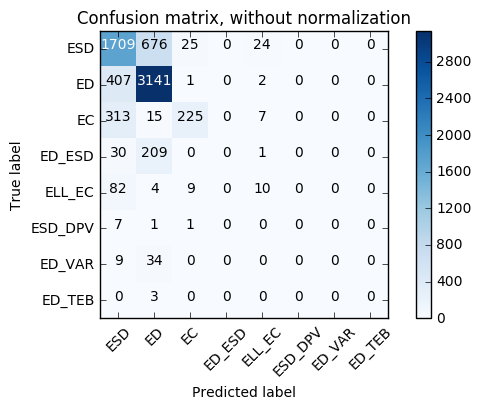

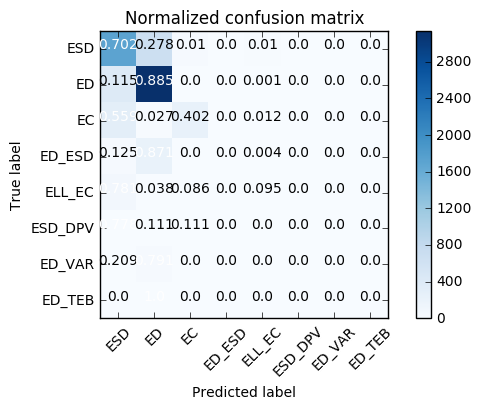

In [21]:
ebes = just_this_class(EB_subclases)
N_features = len(ebes[1,:])
X_ebes = ebes[:,1:N_features]

Y_ebes = label_encoder(ebes[:,0], EB_subclases)

ebes_classifier, Y_ebes_test, ebes_pred = random_forest(X_ebes, Y_ebes, 600 )

confusion_final(Y_ebes_test, ebes_pred, EB_subclases)


In [41]:

N_features = len(caracteristicas[1,:])
X = caracteristicas[:,1:N_features]
Y = big_class_labels

'''
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:, 0], X[:, 2], c=Y, linewidth=0, alpha=0.5, s=20)
plt.grid()
'''

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.25, random_state = True)

clf = RandomForestClassifier(n_estimators=600, max_depth=None, bootstrap = True, n_jobs = -1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict_proba(X_test)

f

FINAL = []
count = 0
for element in X_test:
    gran_class = prediction(clf.predict_proba(element))
    if gran_class == [0]:
        final_class = prediction(rll_classifier.predict_proba(element))
    elif gran_class == [1]:
        final_class = prediction(cephs_classifier.predict_proba(element))   
    else:
        final_class = prediction(ebes_classifier.predict_proba(element))
    FINAL.append(final_class)
    if ((count%500) == 0):
        print count
        count = count + 1 




KeyboardInterrupt: 

C:\Users\Nico\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.,  0.,  1.]])